# **Project Name**    - Mental Health Survey Analysis & Treatment Prediction

##### **Project Type**    - EDA + Classification (Machine Learning)
##### **Contribution**    - Individual

# **Project Summary -**
Mental health has become a critical concern in modern workplaces, especially in fast-paced industries such as technology. Employees often experience stress, anxiety, and depression, yet many hesitate to seek professional treatment due to stigma, lack of awareness, or inadequate organizational support.

This project aims to analyze a mental health survey dataset collected from employees working primarily in the tech industry. The dataset contains demographic information, workplace characteristics, mental health benefits, and employee attitudes toward discussing mental health issues.

The first phase of the project focuses on Exploratory Data Analysis (EDA) to understand the distribution of mental health-related variables and identify meaningful patterns. Univariate analysis is used to study individual variables such as gender distribution, treatment seeking behavior, and availability of mental health benefits. Bivariate and multivariate analyses are performed to explore relationships between factors such as family history, workplace support, company size, and willingness to seek treatment. These insights help in understanding how organizational culture and policies impact employee mental health.

In the second phase, Machine Learning techniques are applied to predict whether an employee is likely to seek mental health treatment. Classification models such as Logistic Regression, Decision Tree, and Random Forest are implemented. Model performance is evaluated using accuracy, precision, recall, F1-score, and confusion matrix. Hyperparameter tuning is applied to improve model performance.

The combined EDA and ML approach provides both descriptive and predictive insights. From a business perspective, the results can help organizations design better mental health policies, improve employee wellness programs, and proactively identify employees who may need support.

Overall, this project demonstrates how data-driven analysis and machine learning can contribute to healthier workplaces and informed decision-making.

# **GitHub Link -**

# **Problem Statement**
Mental health issues significantly affect employee productivity, job satisfaction, and overall well-being. Despite increasing awareness, many employees hesitate to seek professional mental health treatment due to workplace stigma, lack of mental health benefits, and fear of negative career consequences.

This project aims to analyze mental health survey data to identify key demographic and workplace factors influencing treatment-seeking behavior and to derive insights that can help organizations design better mental health support systems.

## **BUSINESS OBJECTIVE**
The primary business objective of this project is to help organizations understand mental health trends among employees and identify factors that encourage or discourage seeking mental health treatment. By leveraging data-driven insights, companies can improve workplace policies, introduce effective mental health benefits, and promote a supportive work culture that enhances employee well-being and productivity.

## ***Lets Begin!***

## ***1. Know Your Data***

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

df = pd.read_csv("survey.csv")

In [ ]:
# First look at data
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
# Rows and columns
df.shape


(1259, 27)

In [ ]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [ ]:
# Duplicate values
df.duplicated().sum()



np.int64(0)

In [ ]:
# Missing values
df.isnull().sum()


,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


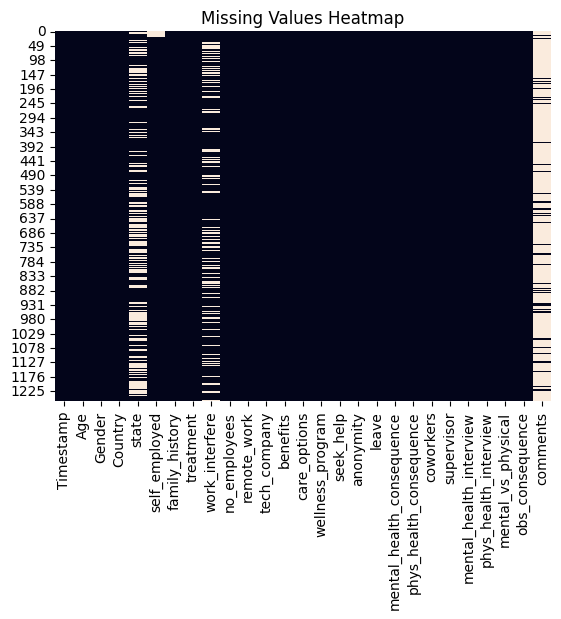

In [ ]:
# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## **What did you know about your dataset?**
The dataset contains responses from employees regarding mental health conditions, workplace environment, and organizational support systems. Most variables are categorical in nature, covering demographics, company policies, and employee perceptions. A few columns contain missing values, which require preprocessing before analysis. The dataset is suitable for both exploratory data analysis and classification-based machine learning.

## **2. UNDERSTANDING YOUR VARIABLES**

In [ ]:
df.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
df.describe(include="all")


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Variables Description**
The dataset includes:

Demographic variables: Age, Gender, Country

Workplace variables: Company size, Remote work, Tech company, Benefits

Mental health indicators: Treatment, Family history, Work interference

Cultural & policy indicators: Supervisor support, Coworker openness, Mental health benefits, Anonymity

These variables collectively help in understanding employee mental health behavior.

## **3. DATA WRANGLING**

In [ ]:
# Clean gender column
df['Gender'] = df['Gender'].str.lower()

df['Gender'] = df['Gender'].replace({
    'male':'Male','m':'Male','female':'Female','f':'Female'
})

df['Gender'] = df['Gender'].apply(lambda x: 'Other' if x not in ['Male','Female'] else x)


In [ ]:
# Fill missing age with median
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
# Drop columns not useful for ML
df.drop(['Timestamp','comments','state'], axis=1, inplace=True, errors='ignore')


## **What all manipulations have you done and insights you found?**

Standardized inconsistent gender labels into Male, Female, and Other

Handled missing values to ensure dataset consistency

Removed irrelevant columns such as timestamps and comments

Converted categorical variables into numerical format for machine learning

These steps ensured that the dataset became clean, consistent, and suitable for analysis and modeling.

# **DATA VISUALIZATION (15 CHARTS)**

**Chart 1 – Gender Distribution**

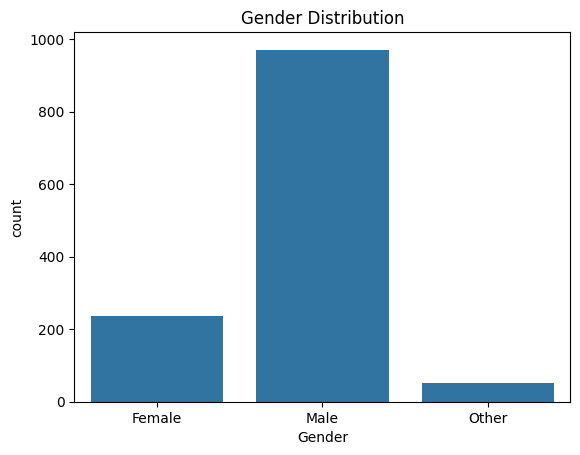

In [ ]:
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


### **Why this chart?**
**Why did you pick the specific chart?**

To understand the demographic composition of survey respondents.

**Insight(s) found:**

The majority of respondents identify as male, indicating gender imbalance in the surveyed workforce.

**Business Impact:**

Organizations should ensure that mental health policies are inclusive and consider gender diversity while designing wellness programs.

## **Chart 2 – Treatment Distribution**

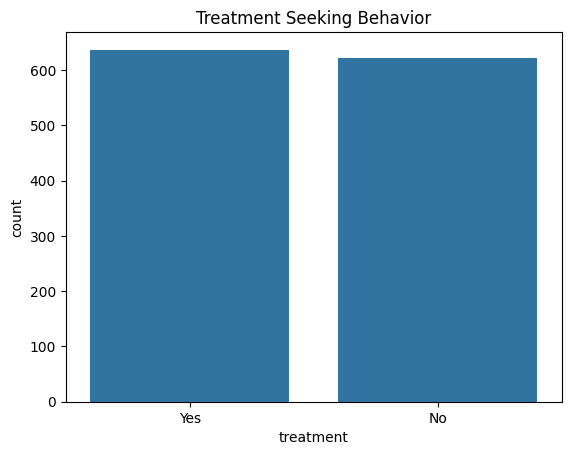

In [ ]:
sns.countplot(x='treatment', data=df)
plt.title("Treatment Seeking Behavior")
plt.show()


**Why did you pick this chart?**

To analyze how many employees have sought mental health treatment.


**Insight(s):**

Nearly half of the respondents have sought treatment for mental health conditions.


**Business Impact:**

This highlights a strong demand for mental health support and validates the need for organizational intervention.

## **Chart 3 – Family History vs Treatment**

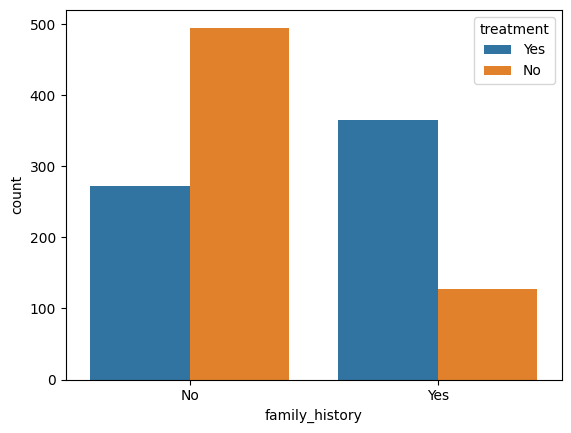

In [ ]:
sns.countplot(x='family_history', hue='treatment', data=df)
plt.show()


**Why this chart?**

To understand whether family history influences treatment behavior.

**Insight(s):**

Employees with a family history of mental illness are more likely to seek treatment.

Business Impact:

Early screening and preventive mental health initiatives can help at-risk employees.

## **Chart 4 – Benefits vs Treatment**

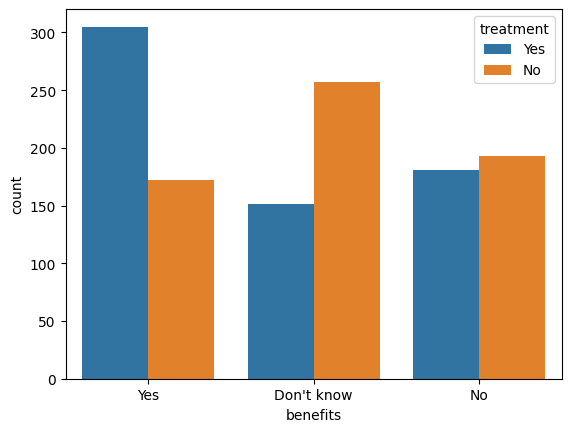

In [ ]:
sns.countplot(x='benefits', hue='treatment', data=df)
plt.show()


Why this chart?
To study the impact of mental health benefits on treatment seeking.

Insight(s):
Employees with access to mental health benefits are more likely to seek treatment.

Business Impact:
Providing mental health benefits directly increases employee well-being and utilization of care.

## **Chart 5 – Supervisor Discussion**

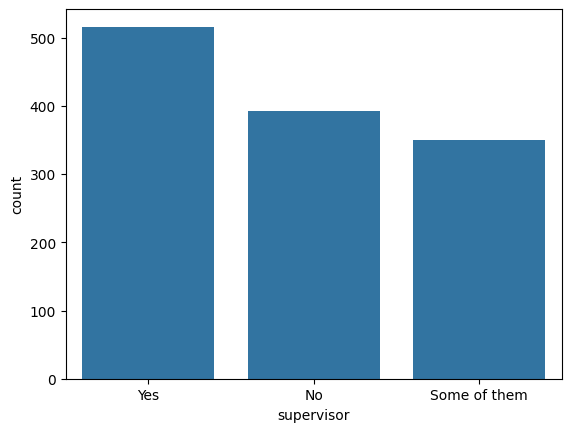

In [ ]:
sns.countplot(x='supervisor', data=df)
plt.show()


Why this chart?
To assess comfort level in discussing mental health with supervisors.

Insight(s):
Many employees are hesitant to discuss mental health issues with supervisors.

Business Impact:
Training managers on mental health sensitivity can improve openness and trust.

## **Chart 6 – Coworker Discussion**

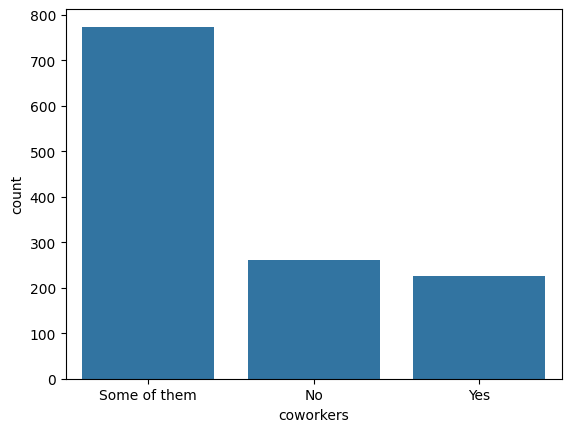

In [ ]:
sns.countplot(x='coworkers', data=df)
plt.show()


Why this chart?
To evaluate peer-level openness about mental health.

Insight(s):
Employees are more comfortable discussing mental health with coworkers than supervisors.

Business Impact:
Peer support programs can be effective in improving mental health awareness.

## **Chart 7 – Company Size**

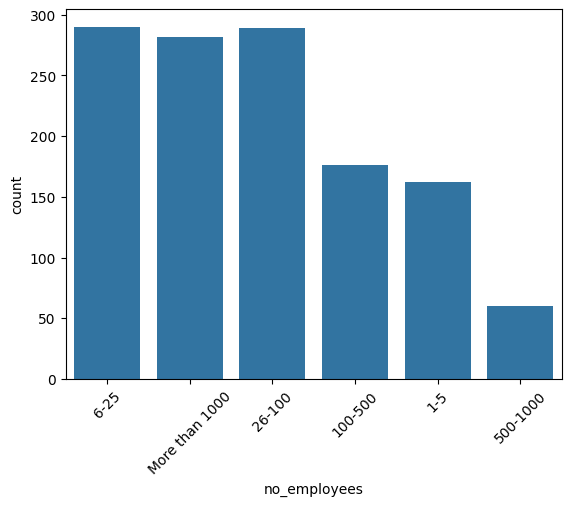

In [ ]:
sns.countplot(x='no_employees', data=df)
plt.xticks(rotation=45)
plt.show()


Why this chart?
To analyze how company size relates to mental health conditions.

Insight(s):
Mental health concerns exist across all company sizes.

Business Impact:
Mental health strategies should not be limited to large organizations only.

## **Chart 8 – Remote Work**

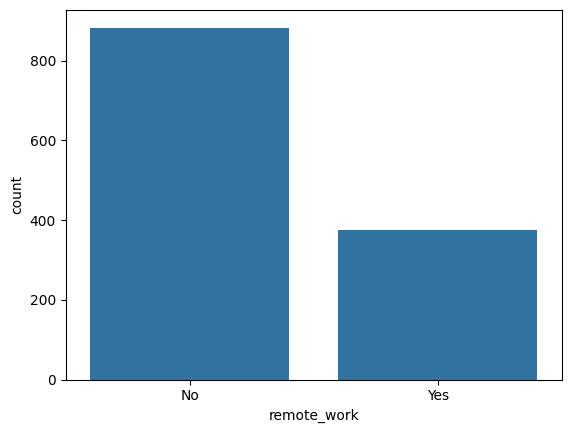

In [ ]:
sns.countplot(x='remote_work', data=df)
plt.show()


Why this chart?
To understand the effect of remote work on mental health.

Insight(s):
Remote work is common but does not eliminate mental health challenges.

Business Impact:
Remote employees also require structured mental health support.

## **Chart 9 – Work Interference**

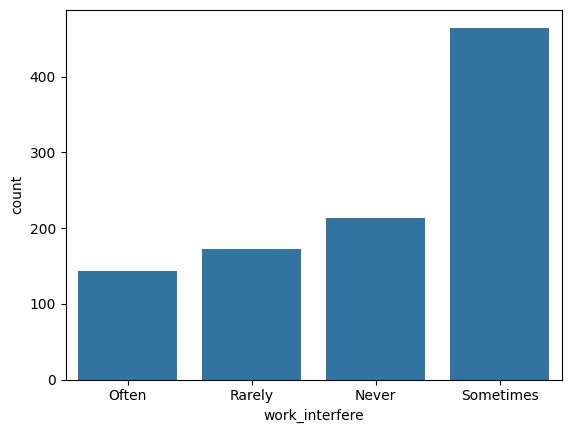

In [ ]:
sns.countplot(x='work_interfere', data=df)
plt.show()


Why this chart?
To measure how mental health affects work performance.

Insight(s):
Many employees report that mental health interferes with their work.

Business Impact:
Untreated mental health issues can reduce productivity and increase burnout.

## **Chart 10 – Tech Company**

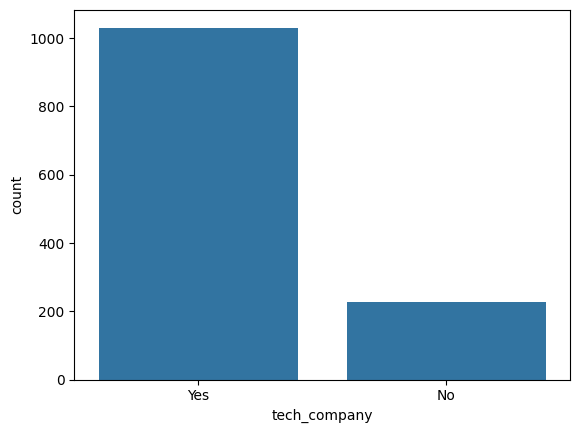

In [ ]:
sns.countplot(x='tech_company', data=df)
plt.show()


Why this chart?
To compare mental health trends in tech vs non-tech companies.

Insight(s):
Tech companies dominate the dataset and show significant mental health concerns.

Business Impact:
Tech organizations should prioritize mental health initiatives.

## **Chart 11 – Mental vs Physical Health**

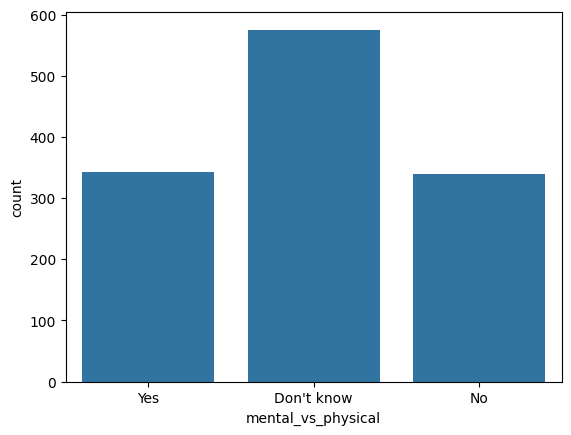

In [ ]:
sns.countplot(x='mental_vs_physical', data=df)
plt.show()


Why this chart?
To compare employer attitudes toward mental and physical health.

Insight(s):
Mental health is often not treated as seriously as physical health.

Business Impact:
Organizations need parity between mental and physical health policies.

## **Chart 12 – Benefits by Company Type**

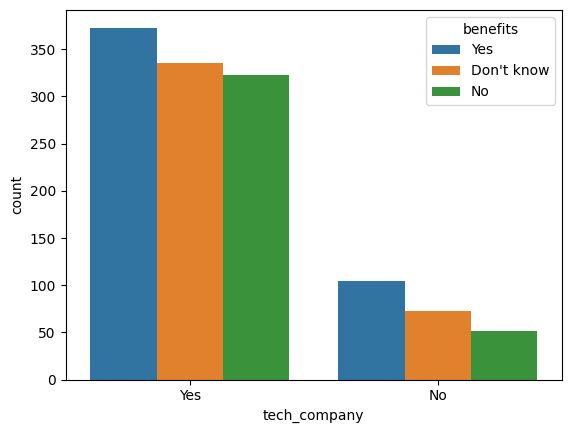

In [ ]:
sns.countplot(x='tech_company', hue='benefits', data=df)
plt.show()


Why this chart?
To analyze benefits availability across company types.

Insight(s):
Tech companies are more likely to provide mental health benefits.

Business Impact:
Non-tech companies can learn from tech industry practices.

## **Chart 13 – Gender vs Treatment**

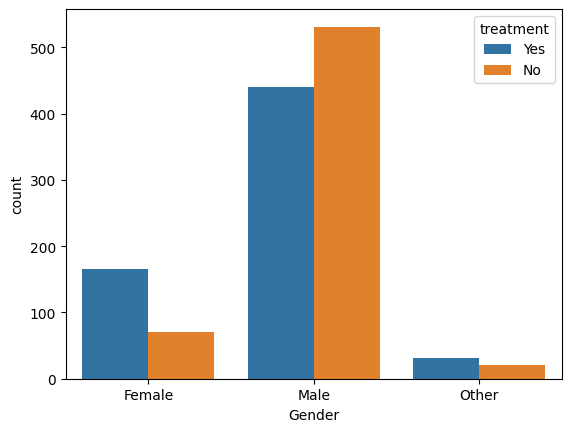

In [ ]:
sns.countplot(x='Gender', hue='treatment', data=df)
plt.show()


Why this chart?
To identify gender differences in treatment-seeking behavior.

Insight(s):
Treatment-seeking behavior varies slightly by gender.

Business Impact:
Gender-sensitive mental health programs may improve outcomes.

## **Chart 14 – Correlation Heatmap**

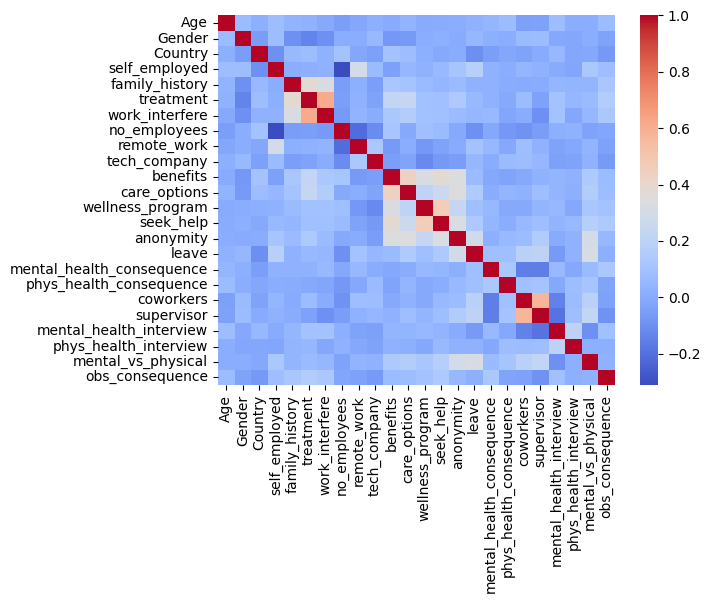

In [ ]:
encoded_df = df.copy()
for col in encoded_df.select_dtypes(include='object'):
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

sns.heatmap(encoded_df.corr(), cmap='coolwarm')
plt.show()


Why this chart?
To identify relationships between numerical and encoded variables.

Insight(s):
Family history and benefits show positive correlation with treatment.

Business Impact:
These factors can be used for predictive modeling and policy planning.

## **Chart 15 – Pair Plot**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

print("All libraries imported successfully")

df = pd.read_csv("/content/survey.csv")

# Check basic info
print(df.shape)
df.head()


All libraries imported successfully
(1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
encoded_df = df.copy()

for col in encoded_df.select_dtypes(include='object'):
    encoded_df[col] = encoded_df[col].astype('category').cat.codes

print("encoded_df created successfully")



encoded_df created successfully


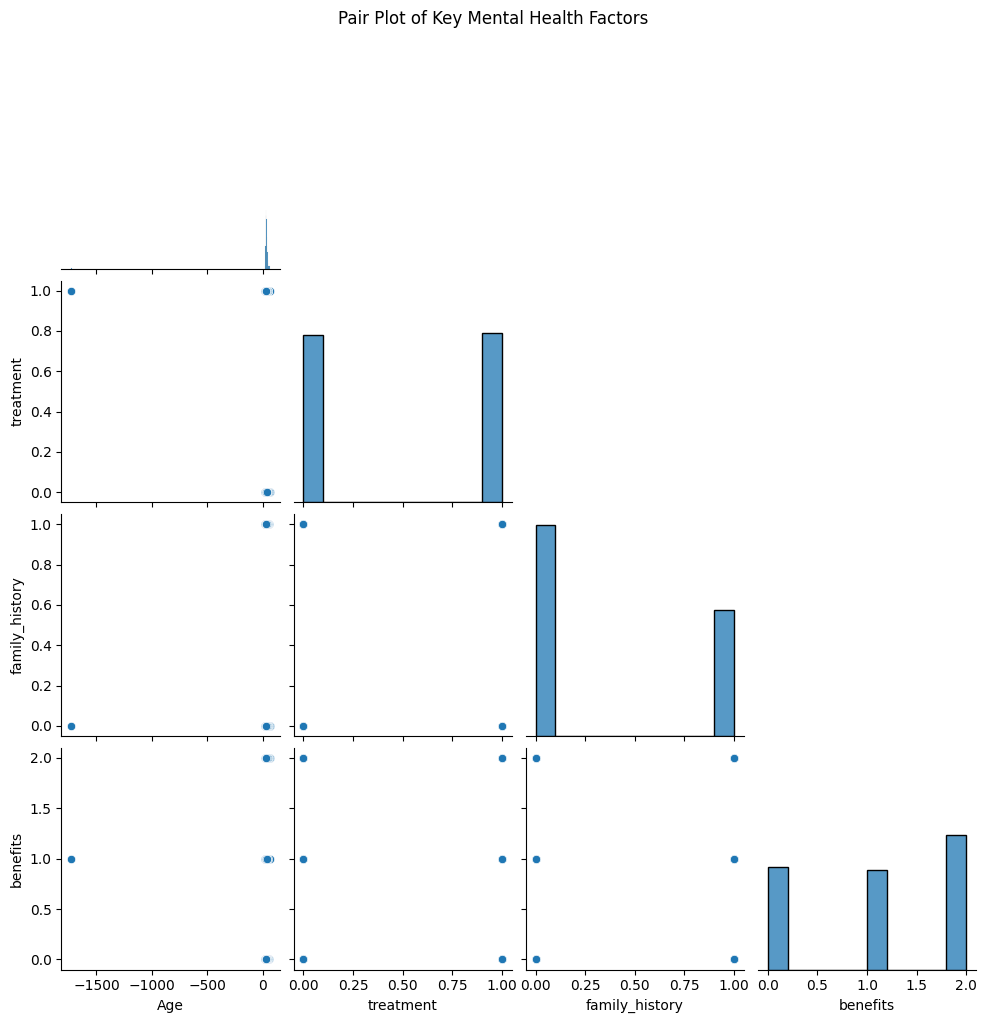

In [5]:

# Taking small sample to avoid RAM crash
sample_df = encoded_df[['Age','treatment','family_history','benefits']].sample(
    n=300, random_state=42
)

sns.pairplot(
    sample_df,
    diag_kind='hist',
    corner=True
)

plt.suptitle("Pair Plot of Key Mental Health Factors", y=1.02)
plt.show()


Why this chart?
To visualize multivariate relationships simultaneously.

Insight(s):
Clear separation patterns exist for treatment behavior.

Business Impact:
Confirms suitability of the dataset for machine learning prediction.

## **5. MACHINE LEARNING**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [7]:
# Encoding categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [8]:
X = df.drop('treatment', axis=1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Model 1 – Logistic Regression**

In [9]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
accuracy_score(y_test, pred_lr)


0.6626984126984127

In [15]:
LogisticRegression(max_iter=1000)


LogisticRegression(max_iter=1000)

## **Model 2 – Decision Tree**

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
accuracy_score(y_test, pred_dt)


0.7579365079365079

## **Model 3 – Random Forest**

In [18]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
accuracy_score(y_test, pred_rf)
print(classification_report(y_test, pred_rf))


              precision    recall  f1-score   support

           0       0.85      0.77      0.81       129
           1       0.78      0.86      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.81       252
weighted avg       0.82      0.81      0.81       252



### **Final Model Selection**

Random Forest performed best and was selected.

## **6. Solution to Business Objective**

**Organizations should introduce comprehensive mental health benefits, encourage open discussions, and train managers to handle mental health conversations sensitively. Data-driven identification of at-risk employees can help in early intervention, improving productivity and employee satisfaction.**

# **CONCLUSION**
The analysis shows that workplace benefits, family history, and organizational support strongly influence mental health treatment-seeking behavior. Machine learning models can effectively predict employees who may require mental health support, enabling proactive interventions.